## Import relevant libraries

In [1]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.9 MB 1.5 MB/s 
     |████████████████████████████████| 102 kB 27.6 MB/s 
     |████████████████████████████████| 690 kB 66.6 MB/s 
     |████████████████████████████████| 4.7 MB 66.7 MB/s 
     |████████████████████████████████| 62 kB 1.8 MB/s 
     |████████████████████████████████| 812 kB 70.1 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=261257 sha256=945c2a909fcac6c9a5ceaf60faf809758ea49de16a4199600319444b9f211135
  Stored in directory: /tmp/pip-ephem-wheel-cache-tlnibwb7/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=1463c60f54993960d1a0d8c0543b957a2b9df72231c2fc34b75c1c0b920a0a22
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3e

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
from pandas_profiling import ProfileReport

In [11]:
df=pd.read_csv("/content/understat.com.csv")

In [12]:
df.rename(columns = {"Unnamed: 0": "league", "Unnamed: 1":"year", "ppda_coef": "passes_allowed"}, inplace = True)

## Features

● __xG__ - expected goals metric, it is a statistical measure of the quality of chances created and conceded.

● __xG_diff__ - difference between actual goals scored and expected goals.

● __npxG__ - expected goals without penalties and own goals.

● __xGA__ - expected goals against.

● __xGA_diff__ - difference between actual goals missed and expected goals against.

● __npxGA__ - expected goals against without penalties and own goals.

● __npxGD__ - difference between "for" and "against" expected goals without penalties and own goals.

● __ppda_coef__ - passes allowed per defensive action in the opposition half (power of pressure)

● __oppda_coef__ - opponent passes allowed per defensive action in the opposition half (power of opponent's pressure)

● __deep__ - passes completed within an estimated 20 yards of goal (crosses excluded)

● __deep_allowed__ - opponent passes completed within an estimated 20 yards of goal (crosses excluded)

● __xpts__ - expected points

● __xpts_diff__ - difference between actual and expected points

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   league          684 non-null    object 
 1   year            684 non-null    int64  
 2   position        684 non-null    int64  
 3   team            684 non-null    object 
 4   matches         684 non-null    int64  
 5   wins            684 non-null    int64  
 6   draws           684 non-null    int64  
 7   loses           684 non-null    int64  
 8   scored          684 non-null    int64  
 9   missed          684 non-null    int64  
 10  pts             684 non-null    int64  
 11  xG              684 non-null    float64
 12  xG_diff         684 non-null    float64
 13  npxG            684 non-null    float64
 14  xGA             684 non-null    float64
 15  xGA_diff        684 non-null    float64
 16  npxGA           684 non-null    float64
 17  npxGD           684 non-null    flo

In [ ]:
df.describe()

,year,position,matches,wins,draws,loses,scored,missed,pts,xG,xG_diff,npxG,xGA,xGA_diff,npxGA,npxGD,passes_allowed,oppda_coef,deep,deep_allowed,xpts,xpts_diff
count,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,6.840000e+02,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000
mean,2016.500000,10.061404,35.935673,13.434211,9.067251,13.434211,48.190058,48.190058,49.369883,47.064744,-1.125315,42.902596,47.064744,-1.125315,42.902596,2.792600e-16,10.911784,10.911772,208.676901,208.676901,49.539598,0.169715
std,1.709075,5.580165,3.203487,5.880962,2.941824,5.510278,17.605374,13.866509,16.957678,14.595888,6.848179,13.695898,11.781399,6.663632,11.002013,1.929269e+01,2.521398,3.301410,83.888073,54.713624,13.559213,7.156998
min,2014.000000,1.000000,27.000000,2.000000,2.000000,1.000000,13.000000,15.000000,13.000000,15.064491,-30.963020,13.166872,16.838674,-29.175087,16.084399,-4.220877e+01,5.683535,4.394458,76.000000,83.000000,17.907700,-24.721600
25%,2015.000000,5.000000,34.000000,9.000000,7.000000,9.000000,36.000000,38.000000,38.000000,37.126256,-4.985319,33.811014,38.916186,-5.698828,35.474606,-1.325816e+01,9.090617,8.809866,151.750000,170.000000,39.466550,-4.498400
50%,2016.500000,10.000000,38.000000,12.000000,9.000000,14.000000,45.000000,48.000000,46.000000,44.706130,-0.608827,40.071031,47.310924,-0.918895,43.031911,-3.127901e+00,10.562543,10.347047,188.000000,205.000000,47.102100,0.116050
75%,2018.000000,15.000000,38.000000,16.000000,11.000000,17.000000,56.000000,58.000000,59.250000,53.864159,3.587158,49.220690,54.834899,3.381834,50.263465,9.740049e+00,12.434874,12.187434,242.000000,246.250000,56.942025,4.912775
max,2019.000000,20.000000,38.000000,32.000000,18.000000,29.000000,118.000000,94.000000,100.000000,113.598270,18.148854,99.477020,88.432186,16.370737,78.535447,7.304931e+01,21.896752,30.468113,582.000000,375.000000,94.380000,23.047500


The data contains statistics between 2014 and 2019

The highest number of points accumulated by a team over these years is 100

The highest number of wins by a team over these years is 32 while the highest number of losses is 29

In [14]:
from google.colab import output
output.enable_custom_widget_manager()

In [15]:
profile=ProfileReport(df, title="Foot ball data report from 2014 to 2019", html={"style":{"full_width":True}})


In [21]:
#profile.to_widgets()
#profile.to_notebook_iframe()

In [20]:
profile.to_file(output_file="Foot ball data report from 2014 to 2019.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [13]:
df.columns

Index(['league', 'year', 'position', 'team', 'matches', 'wins', 'draws',
       'loses', 'scored', 'missed', 'pts', 'xG', 'xG_diff', 'npxG', 'xGA',
       'xGA_diff', 'npxGA', 'npxGD', 'passes_allowed', 'oppda_coef', 'deep',
       'deep_allowed', 'xpts', 'xpts_diff'],
      dtype='object')

## Exploratory Data Analysis

UNIQUE LEAQUES

In [ ]:
df.league.unique()

array(['La_liga', 'EPL', 'Bundesliga', 'Serie_A', 'Ligue_1', 'RFPL'],
      dtype=object)

DISTRIBUTION OF POINT ACROSS LEAQUES FROM 2014 to 2019

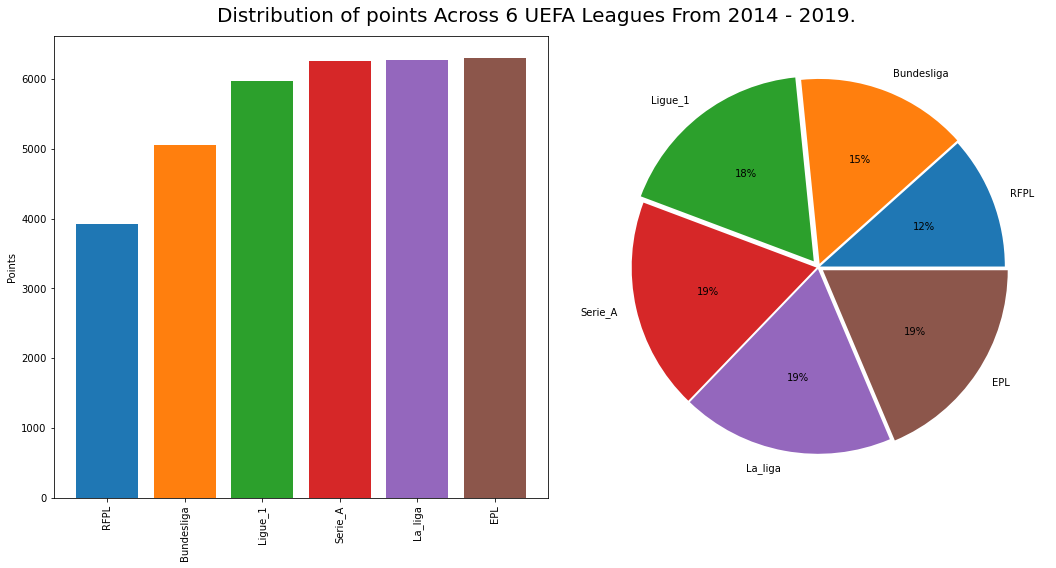

In [ ]:
plt.figure(figsize = [15,8])

points_by_league = df.groupby("league")["pts"].sum(
    ).sort_values(ascending = True)

plt.subplot(1,2,1)
plt.bar(
    x = points_by_league.index,
    height = points_by_league,
    color = sns.color_palette()
)
plt.ylabel("Points")
plt.xticks(rotation = 90);
plt.suptitle("Distribution of points Across 6 UEFA Leagues From 2014 - 2019.", fontsize = 20);

plt.subplot(1,2,2)
explode = np.array([0.01, 0.02, 0.04, 0.01, 0.01, 0.03])
plt.pie(x = points_by_league, labels = points_by_league.index, autopct = "%.0f%%", explode = explode);

plt.tight_layout()

NUMBER OF UNIQUE TEAMS ACROSS THE SIX LEAGUES

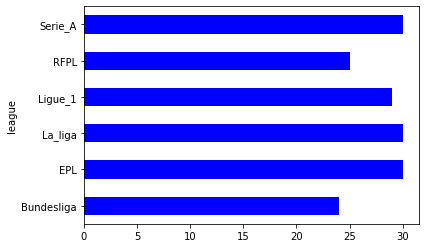

In [ ]:
(df.groupby('league').team.nunique()).plot.barh(color='blue');

__Serie_A__, __La_liga__ and __EPL__ has the highest number of team participation(30 teams), followed by __Ligue_1__(29 teams), then __RFPL__(25 teams) and __Bundesliga__(24 teams). 

Since we have different numbers of teams participation, we ought to analyze the leagues seperately

## EPL

In [24]:
EPL_df = df[df.league=='EPL']

In [ ]:
EPL_df.describe()

The highest number of points recorded for __EPL__ is 100, this means that it is one of the highest performing league.

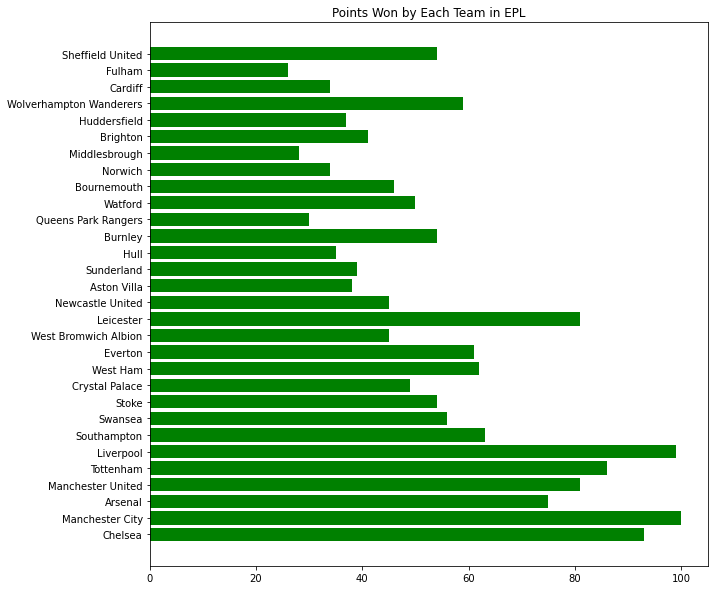

In [ ]:
plt.figure(figsize=(10,10))
plt.barh(EPL_df['team'], EPL_df['pts'], color='green')
plt.title('Points Won by Each Team in EPL');

**WINNING TEAMS IN EPL PER YEAR FROM 2014 TO 2019**

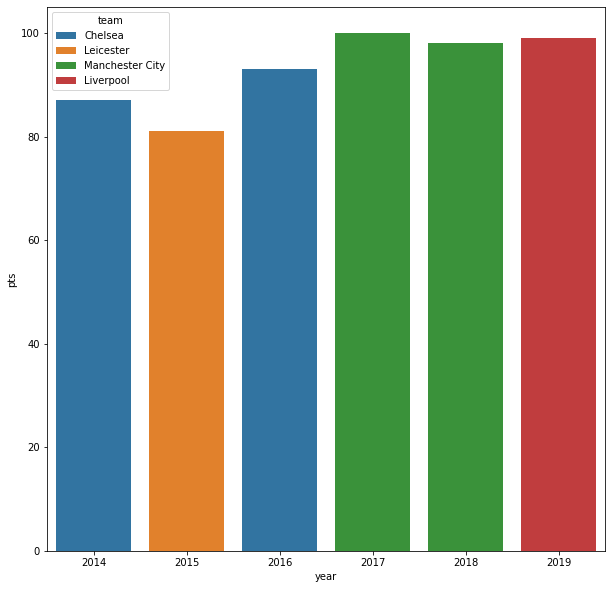

In [ ]:
fig, ax=plt.subplots(figsize=(10,10))
plot=sns.barplot(x='year', y='pts', hue='team', data=EPL_df[EPL_df['position'] == 1], dodge=False)


The winning teams in __EPL__ are Chelsea, Leicester, Manchester City and Liverpool

**NUMBER OF TIMES WINING TEAMS WON THE LEAGUE FROM 2014 TO 2019**

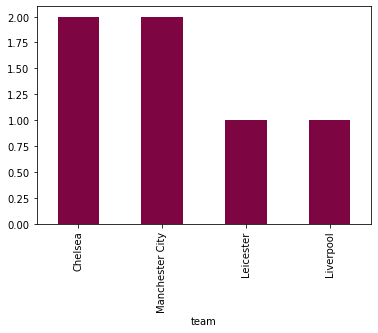

In [41]:
EPL_df[EPL_df['position'] == 1].groupby('team').pts.count().sort_values(ascending=False).plot.bar(color='#7D0541')

## La_liga

In [25]:
La_liga = df[df.league=='La_liga']

In [ ]:
La_liga.describe()

,year,position,matches,wins,draws,loses,scored,missed,pts,xG,xG_diff,npxG,xGA,xGA_diff,npxGA,npxGD,passes_allowed,oppda_coef,deep,deep_allowed,xpts,xpts_diff
count,120.000000,120.000000,120.0,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,2016.500000,10.500000,38.0,14.225000,9.550000,14.225000,50.991667,50.991667,52.225000,50.590325,-0.401342,46.095271,50.590325,-0.401342,46.095271,-2.960595e-17,9.654516,9.654516,214.000000,214.000000,52.438788,0.213788
std,1.714986,5.790459,0.0,6.265099,2.933005,5.679778,19.409127,13.935322,17.750589,15.695525,7.748572,14.682104,10.055751,7.958727,9.257804,2.071048e+01,1.638062,2.421631,95.210602,41.101023,13.481785,7.652968
min,2014.000000,1.000000,38.0,3.000000,2.000000,1.000000,22.000000,18.000000,20.000000,29.560107,-22.448406,27.534686,27.797052,-29.175087,24.727907,-4.220877e+01,5.683535,5.579031,91.000000,114.000000,26.495100,-17.401100
25%,2015.000000,5.750000,38.0,10.000000,8.000000,12.000000,40.000000,42.750000,40.500000,40.486799,-5.134395,36.290534,44.072260,-6.199896,40.131640,-1.341264e+01,8.765096,7.772162,147.750000,185.750000,42.816800,-5.012150
50%,2016.500000,10.500000,38.0,13.000000,9.500000,14.000000,46.000000,51.000000,49.000000,47.133680,1.125551,42.978246,50.644413,-0.069773,46.447073,-3.646443e+00,9.638156,9.252798,190.000000,216.000000,50.445450,0.607750
75%,2018.000000,15.250000,38.0,18.000000,11.000000,18.250000,56.000000,61.000000,60.250000,54.961149,4.651436,50.416723,57.745313,6.035948,51.328576,8.312188e+00,10.781221,11.022032,241.250000,245.500000,58.331300,5.141800
max,2019.000000,20.000000,38.0,30.000000,18.000000,28.000000,118.000000,94.000000,94.000000,113.598270,13.875215,99.477020,78.863255,14.419298,72.013818,7.304931e+01,14.086311,17.961598,570.000000,309.000000,94.380000,20.158700


The highest number of points recorded for __La_liga__ is 94.

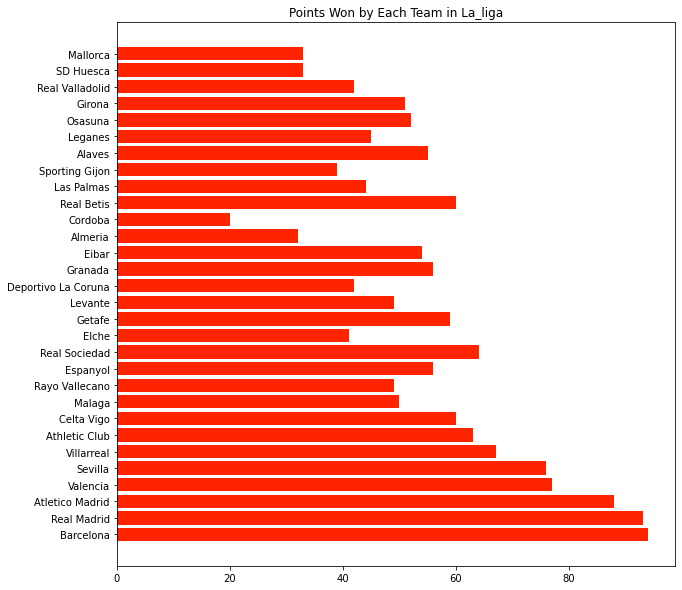

In [ ]:
plt.figure(figsize=(10,10))
plt.barh(La_liga['team'], La_liga['pts'], color='#FF2400')
plt.title('Points Won by Each Team in La_liga');

**WINNING TEAMS IN LA_LIGA PER YEAR FROM 2014 TO 2019**

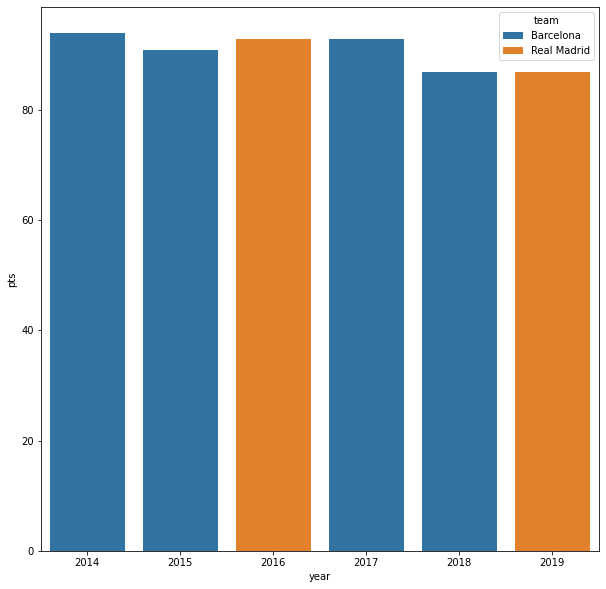

In [ ]:
fig, ax=plt.subplots(figsize=(10,10))
plot=sns.barplot(x='year', y='pts', hue='team', data=La_liga[La_liga['position'] == 1], dodge=False)


**NUMBER OF TIMES WINING TEAMS WON THE LEAGUE FROM 2014 TO 2019**

<AxesSubplot:xlabel='team'>

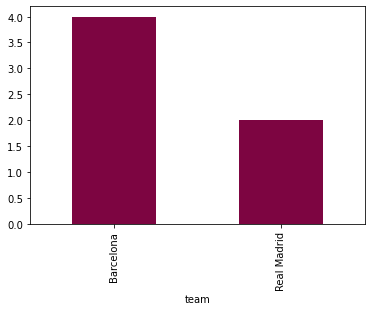

In [ ]:
La_liga[La_liga['position'] == 1].groupby('team').pts.count().sort_values(ascending=False).plot.bar(color='#7D0541')

The winning teams in __La_liga__ is Barcelona and Real Madrid

## Serie_A

In [ ]:
Serie_A = df[df.league=='Serie_A']

In [ ]:
Serie_A.describe()

,year,position,matches,wins,draws,loses,scored,missed,pts,xG,xG_diff,npxG,xGA,xGA_diff,npxGA,npxGD,passes_allowed,oppda_coef,deep,deep_allowed,xpts,xpts_diff
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,2016.500000,10.500000,37.916667,14.208333,9.500000,14.208333,52.491667,52.491667,52.125000,51.026213,-1.465454,45.864169,51.026213,-1.465454,45.864169,3.552714e-16,11.054684,11.050871,227.450000,227.450000,52.373047,0.248047
std,1.714986,5.790459,0.277544,6.329730,3.111378,5.994249,16.297649,13.714983,18.184194,12.386373,7.267452,11.340868,12.048333,6.560906,10.872920,2.048413e+01,2.434392,3.150657,63.976079,56.405174,14.042052,7.715796
min,2014.000000,1.000000,37.000000,2.000000,3.000000,3.000000,25.000000,20.000000,15.000000,28.915261,-26.771265,28.153961,22.998835,-19.626499,19.920635,-3.929609e+01,6.444858,5.757820,112.000000,100.000000,29.381300,-21.494200
25%,2015.000000,5.750000,38.000000,10.000000,7.000000,10.000000,39.750000,43.000000,40.000000,41.998333,-5.842907,37.178089,42.463956,-5.431337,37.792601,-1.509991e+01,9.088270,8.748903,177.000000,184.500000,40.317925,-4.346975
50%,2016.500000,10.500000,38.000000,12.000000,9.000000,14.000000,49.000000,52.000000,47.500000,49.541419,-1.416919,43.844644,51.329472,-1.539328,46.097510,-3.015524e+00,10.486276,10.359466,213.000000,229.500000,49.567650,-1.064650
75%,2018.000000,15.250000,38.000000,18.000000,12.000000,19.000000,61.250000,61.000000,64.000000,59.922190,3.908069,53.283530,60.788905,3.295551,53.943305,1.311496e+01,12.864477,13.003131,271.750000,267.000000,62.223700,5.664200
max,2019.000000,20.000000,38.000000,30.000000,18.000000,29.000000,98.000000,84.000000,95.000000,86.174744,18.148854,78.527354,88.432186,13.371690,78.535447,4.381887e+01,16.884824,26.967792,369.000000,375.000000,82.863300,23.047500


The highest number of points recorded for __Serie_A__ is 95.

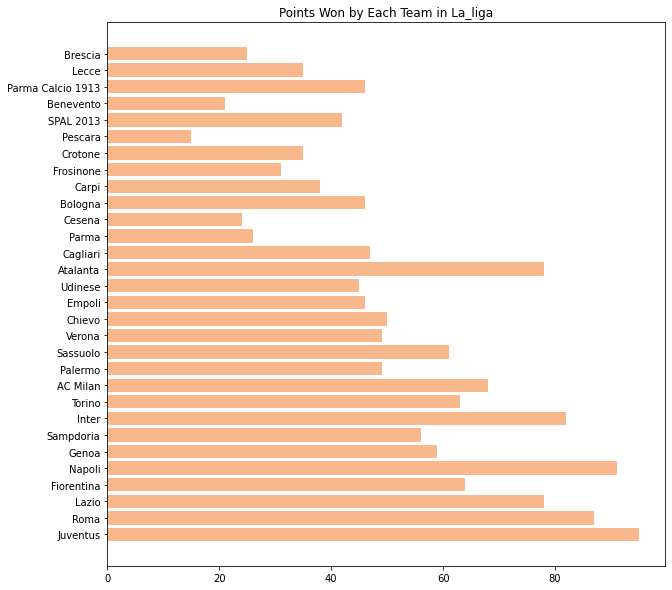

In [ ]:
plt.figure(figsize=(10,10))
plt.barh(Serie_A['team'], Serie_A['pts'], color='#F8B88B')
plt.title('Points Won by Each Team in La_liga');

**WINNING TEAMS IN SERIE_A PER YEAR FROM 2014 TO 2019**

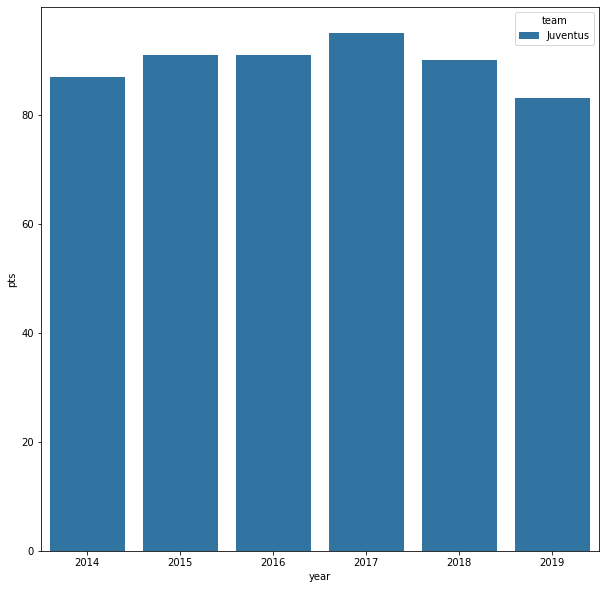

In [ ]:
fig, ax=plt.subplots(figsize=(10,10))
plot=sns.barplot(x='year', y='pts', hue='team', data=Serie_A[Serie_A['position'] == 1], dodge=False)


**NUMBER OF TIMES WINNING TEAMS WON THE LEAGUE FROM 2014 TO 2019**

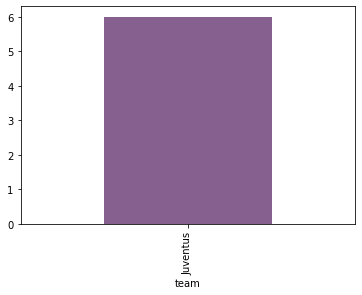

In [ ]:
Serie_A[Serie_A['position'] == 1].groupby('team').pts.count().sort_values(ascending=False).plot.bar(color='#86608E')

Juventus won for the six years in Series_A

## Ligue_1

In [43]:
Ligue_1 = df[df.league=='Ligue_1']

In [ ]:
Ligue_1.describe()

,year,position,matches,wins,draws,loses,scored,missed,pts,xG,xG_diff,npxG,xGA,xGA_diff,npxGA,npxGD,passes_allowed,oppda_coef,deep,deep_allowed,xpts,xpts_diff
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,2016.500000,10.500000,36.316667,13.441667,9.433333,13.441667,46.750000,46.750000,49.758333,45.141445,-1.608555,40.666615,45.141445,-1.608555,40.666615,4.736952e-16,11.028938,11.032684,171.991667,171.991667,49.863386,0.105053
std,1.714986,5.790459,3.781830,5.542496,3.201190,5.308620,17.802488,12.523759,16.138578,13.916616,7.339592,12.726241,9.557286,6.667840,8.809796,1.756691e+01,2.183033,2.629136,62.550752,38.000994,12.823214,7.170049
min,2014.000000,1.000000,27.000000,3.000000,2.000000,2.000000,22.000000,19.000000,13.000000,24.651134,-30.963020,21.610759,22.434996,-18.333389,21.670482,-3.464838e+01,6.342344,6.414753,91.000000,86.000000,28.007300,-24.531500
25%,2015.000000,5.750000,38.000000,10.000000,7.000000,10.000000,35.000000,38.000000,38.000000,36.418133,-5.418713,32.492412,39.543448,-6.668538,35.957559,-1.088878e+01,9.527948,9.489468,132.750000,145.000000,41.640650,-4.630250
50%,2016.500000,10.500000,38.000000,12.000000,9.000000,14.000000,42.000000,46.500000,48.000000,42.798649,-0.782581,37.977506,45.156741,-1.561617,41.012219,-2.314358e+00,11.059302,10.556923,164.500000,171.500000,48.354900,-0.253950
75%,2018.000000,15.250000,38.000000,16.000000,11.000000,17.000000,53.000000,55.000000,56.500000,48.286188,3.471583,44.136797,51.089661,3.058983,46.945436,6.016496e+00,12.451429,12.058084,192.750000,196.250000,55.547400,4.426950
max,2019.000000,20.000000,38.000000,30.000000,18.000000,26.000000,108.000000,83.000000,96.000000,95.344060,14.174308,86.223077,73.283328,14.886751,68.008525,5.786981e+01,17.421286,21.270465,478.000000,281.000000,90.274800,19.155400


The highest number of points recorded fro __Ligue_1 is 96

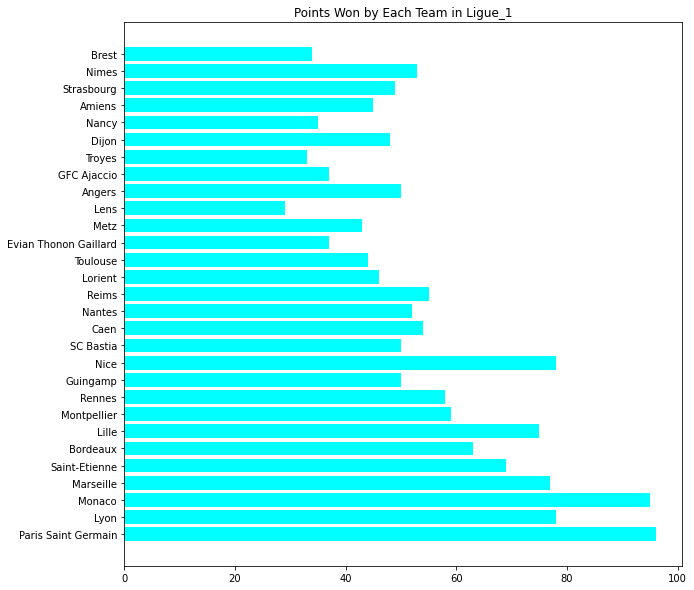

In [44]:
plt.figure(figsize=(10,10))
plt.barh(Ligue_1['team'], Ligue_1['pts'], color='cyan')
plt.title('Points Won by Each Team in Ligue_1');

**WINNING TEAMS IN LIGUE_1 PER YEAR FROM 2014 TO 2019**

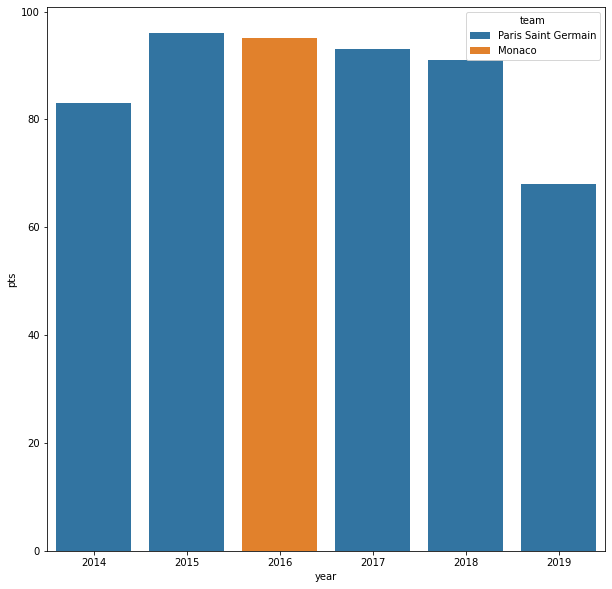

In [ ]:
fig, ax=plt.subplots(figsize=(10,10))
plot=sns.barplot(x='year', y='pts', hue='team', data=Ligue_1[Ligue_1['position'] == 1], dodge=False)

**NUMBER OF TIMES WINNING TEAMS WON THE LEAGUE FROM 2014 TO 2019**

<AxesSubplot:xlabel='team'>

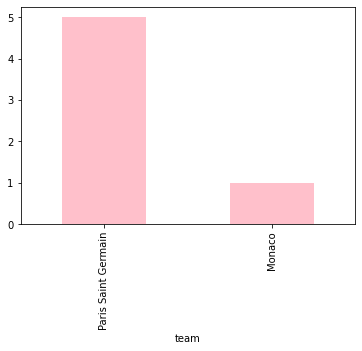

In [ ]:
Ligue_1[Ligue_1['position'] == 1].groupby('team').pts.count().sort_values(ascending=False).plot.bar(color='pink')

The winning teams in __Ligue_1__ is Paris Sant Germain and Real Monaco

## RFPL

In [37]:
RFPL = df[df.league=='RFPL']

In [ ]:
RFPL.describe()

,year,position,matches,wins,draws,loses,scored,missed,pts,xG,xG_diff,npxG,xGA,xGA_diff,npxGA,npxGD,passes_allowed,oppda_coef,deep,deep_allowed,xpts,xpts_diff
count,96.00000,96.000000,96.0,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,2016.50000,8.500000,30.0,10.885417,8.229167,10.885417,34.885417,34.885417,40.885417,33.648690,-1.236726,30.142857,33.648690,-1.236726,30.142857,0.000000,10.697584,10.697584,179.760417,179.760417,40.888084,0.002668
std,1.71679,4.633971,0.0,4.555782,2.535969,4.393464,11.681627,10.363773,13.022143,9.357747,5.337627,8.512091,8.173421,5.887153,7.442254,13.425702,2.431317,2.649108,66.381790,43.551722,10.039479,6.319369
min,2014.00000,1.000000,30.0,2.000000,3.000000,2.000000,13.000000,15.000000,13.000000,15.064491,-15.977961,13.166872,16.838674,-16.493856,16.084399,-35.452036,6.543688,5.661046,76.000000,87.000000,17.907700,-23.998500
25%,2015.00000,4.750000,30.0,7.000000,6.000000,8.000000,25.000000,28.000000,31.000000,27.129795,-4.586700,24.795291,27.218191,-4.756895,24.626834,-9.608227,8.927048,8.867418,132.000000,146.750000,33.577750,-4.228525
50%,2016.50000,8.500000,30.0,10.000000,8.000000,11.000000,33.000000,33.000000,38.500000,31.605375,-1.478929,28.217528,33.000866,-0.188705,29.374306,-0.493966,10.439436,10.453681,162.000000,174.500000,39.122200,0.074650
75%,2018.00000,12.250000,30.0,14.000000,10.000000,14.000000,42.250000,42.250000,50.000000,40.003500,2.317407,35.270653,38.860233,2.825674,35.260337,8.717024,12.171317,12.216135,217.250000,208.750000,47.800575,4.325675
max,2019.00000,16.000000,30.0,22.000000,15.000000,22.000000,67.000000,64.000000,72.000000,62.392129,12.896445,54.095089,55.725229,15.454632,51.953859,32.191496,19.044158,17.711305,372.000000,318.000000,63.844800,13.724000


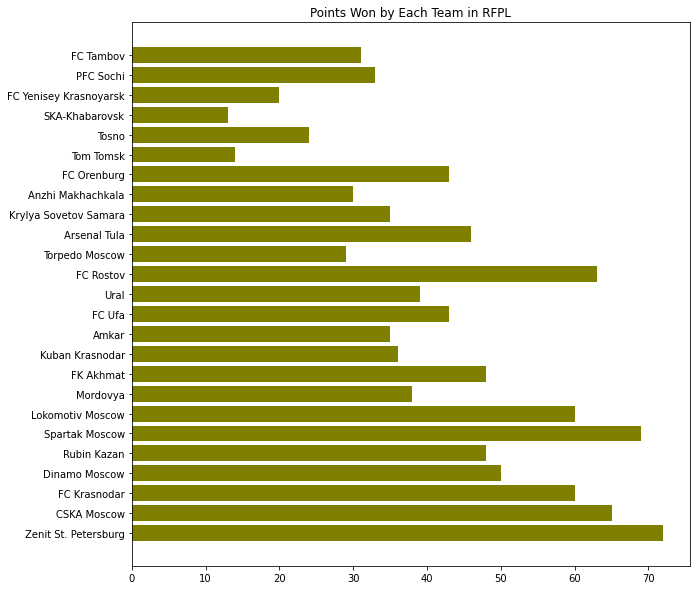

In [47]:
plt.figure(figsize=(10,10))
plt.barh(RFPL['team'], RFPL['pts'], color='#808000')
plt.title('Points Won by Each Team in RFPL');

**WINNING TEAMS IN RFPL PER YEAR FROM 2014 TO 2019**

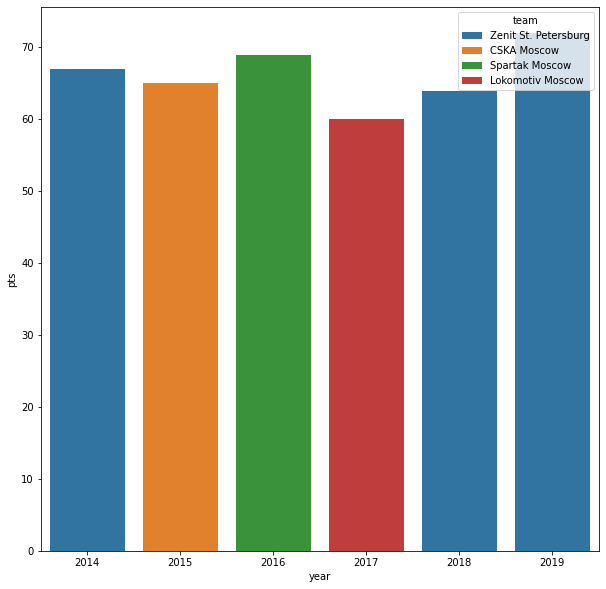

In [38]:
fig, ax=plt.subplots(figsize=(10,10))
plot=sns.barplot(x='year', y='pts', hue='team', data=RFPL[RFPL['position'] == 1], dodge=False)

**NUMBER OF TIMES WINNING TEAMS WON THE LEAGUE FROM 2014 TO 2019**

<AxesSubplot:xlabel='team'>

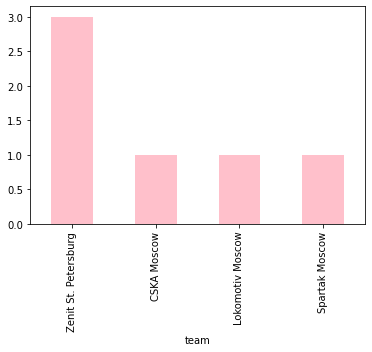

In [ ]:
RFPL[RFPL['position'] == 1].groupby('team').pts.count().sort_values(ascending=False).plot.bar(color='pink')

The winning teams in __RFPL__ are Zenit St. Petersburg, CSKA Moscow, Lokomotiv Moscow, and Spartak Moscow

## Bundesliga

In [26]:
Bundesliga = df[df.league=='Bundesliga']

In [27]:
Bundesliga.describe()

,year,position,matches,wins,draws,loses,scored,missed,pts,xG,xG_diff,npxG,xGA,xGA_diff,npxGA,npxGD,passes_allowed,oppda_coef,deep,deep_allowed,xpts,xpts_diff
count,108.000000,108.000000,108.0,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,1.080000e+02,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,2016.500000,9.500000,34.0,12.824074,8.351852,12.824074,49.962963,49.962963,46.824074,48.699397,-1.263566,45.094381,48.699397,-1.263566,45.094381,2.302685e-16,11.170879,11.170879,202.935185,202.935185,47.140381,0.316307
std,1.715787,5.212315,0.0,5.212904,2.613104,4.773033,15.860328,11.981236,14.755850,13.365678,6.549721,13.143829,10.139608,5.905770,9.784769,2.004250e+01,2.900721,4.108193,70.742956,44.083242,12.024165,6.309963
min,2014.000000,1.000000,34.0,3.000000,3.000000,2.000000,25.000000,17.000000,19.000000,31.646730,-19.738336,27.363924,20.794377,-14.455666,19.278818,-3.528055e+01,5.693289,4.394458,96.000000,83.000000,25.205500,-13.146000
25%,2015.000000,5.000000,34.0,9.000000,7.000000,10.000000,38.000000,42.000000,37.000000,38.737180,-4.302601,35.587823,41.834641,-5.233107,38.938093,-1.406345e+01,9.054368,8.803239,153.750000,172.750000,39.192225,-4.562775
50%,2016.500000,9.500000,34.0,12.000000,8.000000,13.000000,46.000000,50.000000,43.000000,45.730766,-0.702111,42.109068,48.589100,-1.103002,44.918711,-3.553709e+00,10.864652,10.287030,184.000000,206.500000,45.274100,0.064750
75%,2018.000000,14.000000,34.0,15.000000,10.000000,16.000000,58.250000,58.000000,55.000000,54.005998,2.743131,50.657174,54.966211,3.101049,50.702944,8.261728e+00,12.856768,12.089163,232.250000,232.250000,53.135800,4.392950
max,2019.000000,18.000000,34.0,28.000000,15.000000,23.000000,100.000000,75.000000,88.000000,92.851562,10.465999,89.209907,73.120366,16.370737,67.816015,6.634415e+01,20.304275,30.236541,435.000000,309.000000,82.003000,16.115800


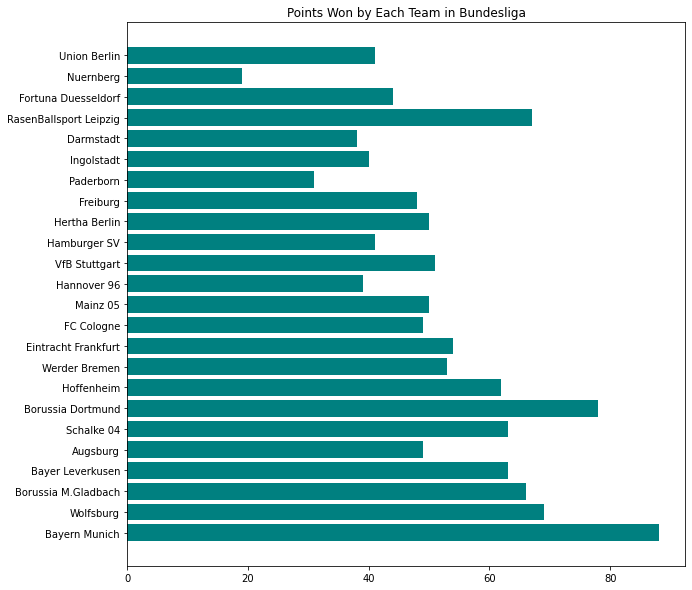

In [49]:
plt.figure(figsize=(10,10))
plt.barh(Bundesliga['team'], Bundesliga['pts'], color='#008080')
plt.title('Points Won by Each Team in Bundesliga');

**WINNING TEAMS IN BUNDESLIGA PER YEAR FROM 2014 TO 2019**

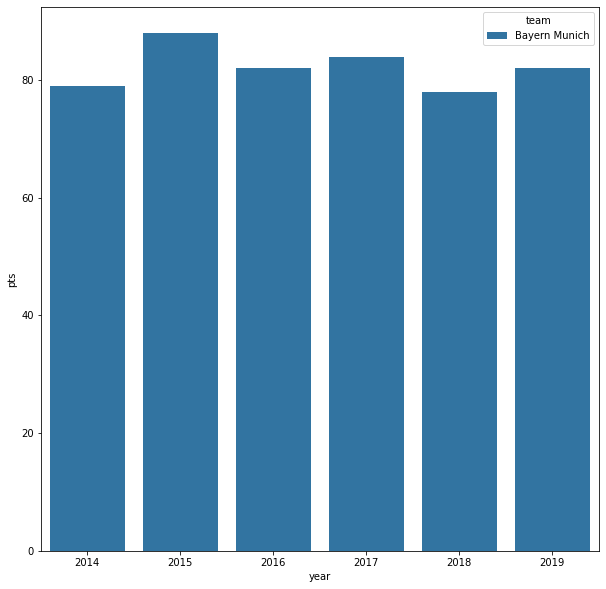

In [39]:
fig, ax=plt.subplots(figsize=(10,10))
plot=sns.barplot(x='year', y='pts', hue='team', data=Bundesliga[Bundesliga['position'] == 1], dodge=False)

**NUMBER OF TIMES WINNING TEAMS WON THE LEAGUE FROM 2014 TO 2019**

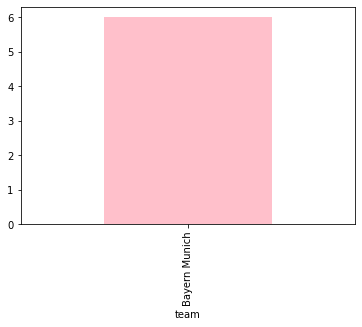

In [28]:
Bundesliga[Bundesliga['position'] == 1].groupby('team').pts.count().sort_values(ascending=False).plot.bar(color='pink')

Bayern Munich won for the six years in __Bundesliga__

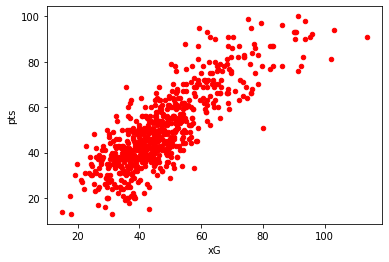

In [29]:
df.plot.scatter(x = 'xG', y = 'pts', c = 'red');

Teams with high expected goals gets more points

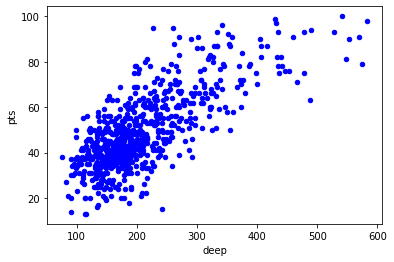

In [30]:
df.plot.scatter(x = 'deep', y = 'pts', c = 'blue');

The higher the passes completed within an estimated 20 yards of goal by a team, the higher the points.  

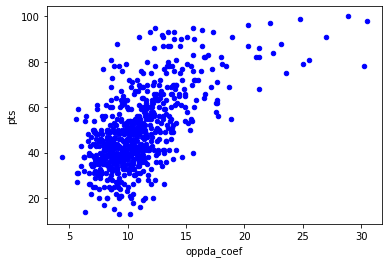

In [31]:
df.plot.scatter(x = 'oppda_coef', y = 'pts', c = 'blue');

The higher the defensive action, the higher the points

In [32]:
winning_team_df = df[df['position'] == 1]
winning_team_df['team'].unique()

array(['Barcelona', 'Real Madrid', 'Chelsea', 'Leicester',
       'Manchester City', 'Liverpool', 'Bayern Munich', 'Juventus',
       'Paris Saint Germain', 'Monaco', 'Zenit St. Petersburg',
       'CSKA Moscow', 'Spartak Moscow', 'Lokomotiv Moscow'], dtype=object)

In [33]:
winning_team_df.corr()

,year,position,matches,wins,draws,loses,scored,missed,pts,xG,xG_diff,npxG,xGA,xGA_diff,npxGA,npxGD,passes_allowed,oppda_coef,deep,deep_allowed,xpts,xpts_diff
year,1.000000,NaN,-0.132598,0.030959,-0.274229,0.079517,0.021061,0.283024,-0.030581,0.108718,0.191105,0.121191,0.333738,0.095212,0.312307,-0.001979,0.316179,0.290565,0.113729,0.058917,-0.139355,-0.186914
position,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
matches,-0.132598,NaN,1.000000,0.799130,0.267892,-0.163268,0.617638,0.417252,0.890075,0.525873,-0.281293,0.496419,0.498599,0.150503,0.494176,0.317593,0.134827,-0.005220,0.337678,0.301744,0.735312,-0.175127
wins,0.030959,NaN,0.799130,1.000000,-0.269881,-0.244914,0.777012,0.158025,0.975472,0.626829,-0.430673,0.636108,0.233566,0.125897,0.254732,0.563986,-0.031090,0.325478,0.514005,-0.051868,0.789969,-0.218800
draws,-0.274229,NaN,0.267892,-0.269881,1.000000,-0.402840,-0.135997,0.226251,-0.051305,-0.062016,0.180817,-0.112594,0.358871,0.217932,0.378913,-0.275727,0.186624,-0.387311,-0.178809,0.502079,-0.013565,0.058830
loses,0.079517,NaN,-0.163268,-0.244914,-0.402840,1.000000,-0.333468,0.207701,-0.346109,-0.286191,0.146860,-0.294077,-0.037424,-0.364991,-0.143845,-0.249914,0.086732,-0.205124,-0.237975,-0.009282,-0.294687,0.053288
scored,0.021061,NaN,0.617638,0.777012,-0.135997,-0.333468,1.000000,0.245640,0.774803,0.904807,-0.337427,0.901805,0.297589,0.094854,0.320397,0.816456,-0.281558,0.404889,0.655828,-0.087961,0.877005,0.248195
missed,0.283024,NaN,0.417252,0.158025,0.226251,0.207701,0.245640,1.000000,0.215621,0.267640,0.017442,0.238320,0.781421,-0.276231,0.722334,-0.048773,0.351876,-0.133867,0.017194,0.509344,0.131223,-0.121745
pts,-0.030581,NaN,0.890075,0.975472,-0.051305,-0.346109,0.774803,0.215621,1.000000,0.635951,-0.405345,0.634012,0.324288,0.180397,0.350822,0.521915,0.010418,0.249034,0.492233,0.060983,0.816231,-0.213484
xG,0.108718,NaN,0.525873,0.626829,-0.062016,-0.286191,0.904807,0.267640,0.635951,1.000000,0.095542,0.988838,0.324069,0.103084,0.352100,0.894927,-0.383672,0.484614,0.744899,-0.044708,0.879230,0.473251


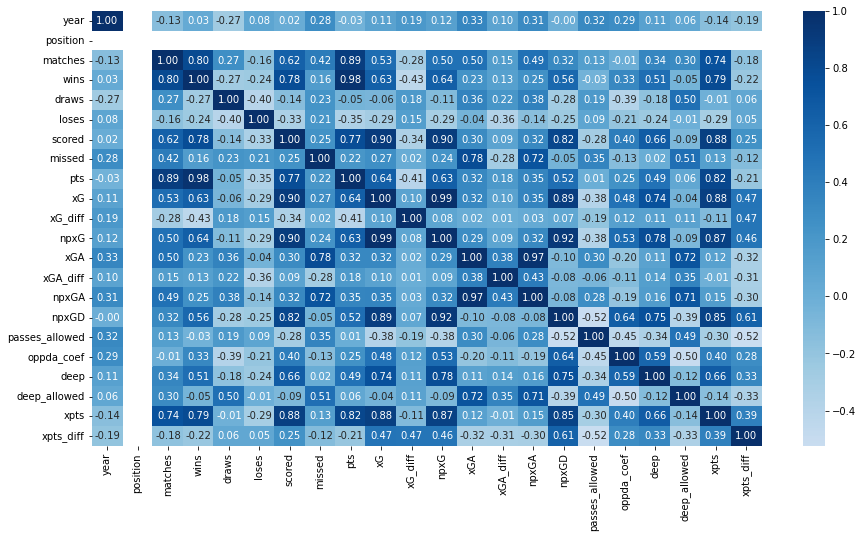

In [34]:
plt.figure(figsize = [15,8])

sns.heatmap(winning_team_df.corr(), cmap = "Blues", annot = True, fmt =".2f", center = 0);
plt.yticks(rotation = 0);